# 1- Setup and Load Data

## 1.1 Install libraries



In [1]:
#! pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
# Import libraries
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Avoid OOM Errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Removing dodgy Images

In [4]:
# import libraries
import cv2 as cv
import imghdr

In [5]:
data_dir = 'data'

In [6]:
os.listdir(data_dir)

['happy', 'sad']

In [7]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [8]:
# number of images
happy = len(os.listdir(os.path.join(data_dir,'happy')))
sad = len(os.listdir(os.path.join(data_dir,'sad')))
print(f'We have {happy} Happy Images')
print(f'We have {sad} Sad Images')

We have 82 Happy Images
We have 66 Sad Images


In [9]:
# Remove all dodgy Images
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            
            if tip not in image_exts:
                print(f"Image not in ext list {image_path}")
                os.remove(image_path)
        except Exception as e:
            print(f"Issue with Image '{image_path}'")

## 1.3 Load Data

In [10]:
# if you want know Information in details about something in tf use "??"
tf.keras.utils.image_dataset_from_directory?

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Docstring:
Generates a `tf.data.Dataset` from image files in a directory.

If your directory structure is:

```
main_directory/
...class_a/
......a_image_1.jpg
......a_image_2.jpg
...class_b/
......b_image_1.jpg
......b_image_2.jpg
```

Then calling `image_dataset_from_directory(main_directory,
labels='inferred')` will return a `tf.data.Dataset` that yields batches of
images from the subdirectories `class_a` and `class_b`, together with labels
0 and 1 (0 corresponding to `class_a` and 1 corresponding to `class_b`).

Supported image formats: jpeg, png, bmp, gif.
Animated gifs are truncated to the first frame.

In [11]:
# load the Data and build the data Pipeline 
data = tf.keras.utils.image_dataset_from_directory(data_dir ,batch_size=32 , image_size=(256, 256))


Found 148 files belonging to 2 classes.


In [12]:
# Convert data and looping through it
data_iterator = data.as_numpy_iterator()

#grabbing one batch
batch = data_iterator.next()


In [13]:
# Images representation as numpy array
batch[0].shape

(32, 256, 256, 3)

In [14]:
# Labels
batch[1]

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0])

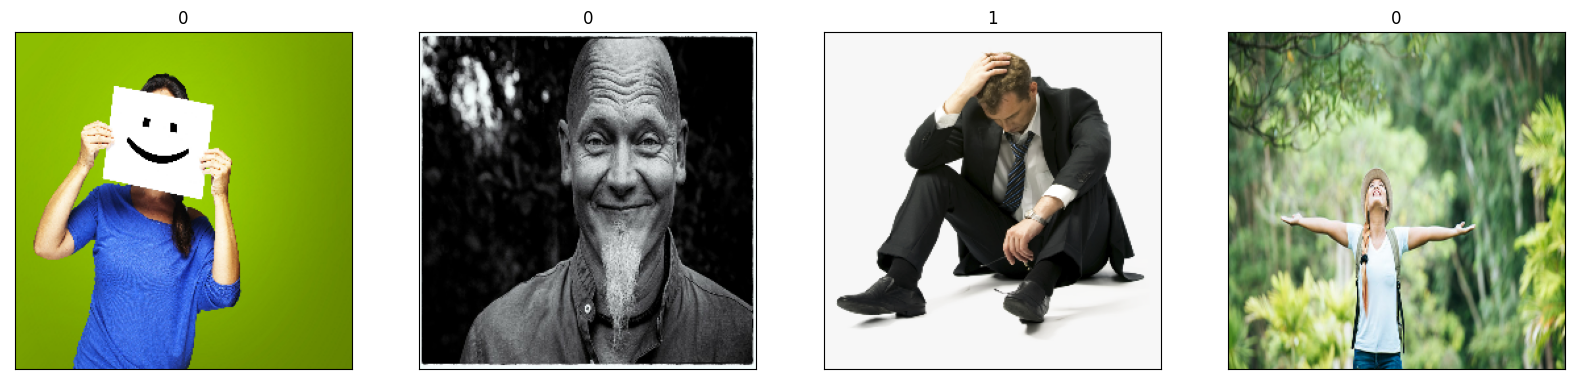

In [15]:
# Images Visualization
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    ax[idx].set_xticks([])
    ax[idx].set_yticks([])


# 2-Preprocessing Data

## 2.1 Scale the Data

In [16]:
# check Before scaleing the data 
# max is 255.0 and min is 0.0
print(f' Max = {data.as_numpy_iterator().next()[0].max()}')
print(f' Min = {data.as_numpy_iterator().next()[0].min()}')

 Max = 255.0
 Min = 0.0


In [17]:
# apply map for scaling all images
data = data.map(lambda x,y:(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
# ok Now we scaled the data 
# max is 1.0 and min is 0.0
print(f' Max become {data.as_numpy_iterator().next()[0].max()}')
print(f' Min become {data.as_numpy_iterator().next()[0].min()}')

 Max become 1.0
 Min become 0.0


## 2.2 Split Data

In [19]:
# how many Batchs in the data
print(f'Number of batches in data = {len(data)}')

Number of batches in data = 5


In [20]:
# spliting the data into train, test, validation sets
train_size, test_size, val_size = int(len(data)*.6), int(len(data)*(0.2)), int(len(data)*(.2))
print(f'train_size, test_size, val_size = {train_size, test_size, val_size}')

train_size, test_size, val_size = (3, 1, 1)


In [21]:
# apply splitting 
train = data.take(train_size)
test = data.skip(train_size).take(test_size)
val = data.skip(train_size + test_size).take(val_size)

In [22]:
# check that split is Right
print(f'length of testing batches = {len(test)}')
print(f'length of training batches = {len(train)}')
print(f'length of validation batches = {len(val)}')

length of testing batches = 1
length of training batches = 3
length of validation batches = 1


# 3- The Deep Model

## 3.1 Building Deeplearning Model

In [23]:
# import dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [24]:
# initial model
Model = Sequential(name='Mido')

In [25]:
# show model API
Model?

Signature:      Model(*args, **kwargs)
Type:           Sequential
String form:    <keras.engine.sequential.Sequential object at 0x0000026A679301F0>
File:           c:\users\dell\.pyenv\pyenv-win\versions\3.10.0\lib\site-packages\keras\engine\sequential.py
Docstring:     
`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

`Sequential` provides training and inference features on this model.

Examples:

```python
# Optionally, the first layer can receive an `input_shape` argument:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# Afterwards, we do automatic shape inference:
model.add(tf.keras.layers.Dense(4))

# This is identical to the following:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(16,)))
model.add(tf.keras.layers.Dense(8))

# Note that you can also omit the `input_shape` argument.
# In that case the model doesn't have any weights until the first call
# to a training/evaluation method (since it isn't yet b

In [26]:
# preforming Convoluation layers and maxplooling layers
Model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
Model.add(MaxPooling2D())

Model.add(Conv2D(32, (3,3), 1,  activation='relu'))
Model.add(MaxPooling2D())

Model.add(Conv2D(16, (3,3), 1,  activation='relu'))
Model.add(MaxPooling2D())

# preforming Flatten layers and Dense layers
Model.add(Flatten())
Model.add(Dense(256, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))


In [27]:
# print model summary
Model.summary()

Model: "Mido"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0      

In [28]:
# Compile the model
Model.compile(
    optimizer = 'adam',
    loss = 'BinaryCrossentropy',
    metrics = ['accuracy'])

## 3.2 Train

In [29]:
log_dir = 'logs'

In [30]:
# Enable Visualizations for TensorBoard
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir)


In [31]:
# Fitting the Model and Save details in History
history = Model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 0.8940 - accuracy: 0.4896 - val_loss: 0.6849 - val_accuracy: 0.5500
Epoch 2/20
3/3 [==============================] - 10s 3s/step - loss: 0.6489 - accuracy: 0.5625 - val_loss: 0.5898 - val_accuracy: 0.6500
Epoch 3/20
3/3 [==============================] - 10s 3s/step - loss: 0.6308 - accuracy: 0.5625 - val_loss: 0.5937 - val_accuracy: 0.9000
Epoch 4/20
3/3 [==============================] - 10s 3s/step - loss: 0.5854 - accuracy: 0.7188 - val_loss: 0.3720 - val_accuracy: 0.7500
Epoch 5/20
3/3 [==============================] - 10s 3s/step - loss: 0.5690 - accuracy: 0.7188 - val_loss: 0.3995 - val_accuracy: 0.8500
Epoch 6/20
3/3 [==============================] - 10s 3s/step - loss: 0.4423 - accuracy: 0.8229 - val_loss: 0.4156 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 10s 3s/step - loss: 0.4808 - accuracy: 0.7500 - val_loss: 0.5425 - val_accuracy: 0.6000
Epoch 8/20
3/3 [==================

## 3.3 Plot Performance

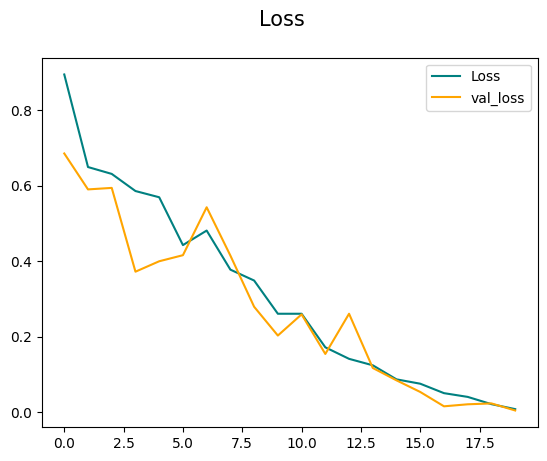

In [32]:
# plot loss vs val_loss to see model performance
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='Loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
plt.suptitle("Loss", fontsize=15)
plt.legend()
plt.show()

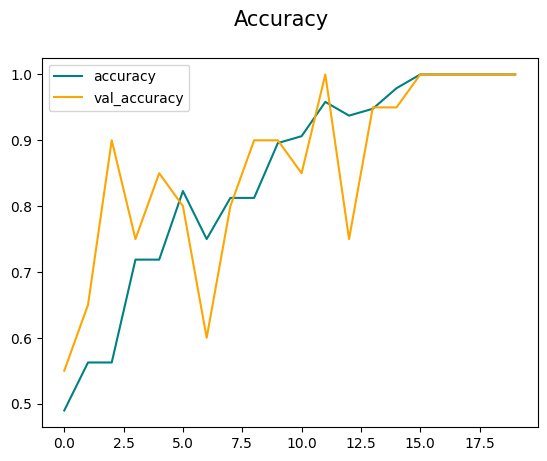

In [33]:
# plot accuracy vs val_accuracy to see model performance
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle("Accuracy", fontsize=15)
plt.legend()
plt.show()

# 4- Evaluation Performance

## 4.1 Evaluate

In [34]:
# import metrics
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
# make instance 
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [36]:
# compute metrics on test data
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = Model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 494ms/step


In [37]:
# Show metrics result
print(f'Accuracy = {acc.result().numpy()}')
print(f'Recall = {re.result().numpy()}')
print(f'Precision = {pre.result().numpy()}')

Accuracy = 1.0
Recall = 1.0
Precision = 1.0


## 4.2 Test

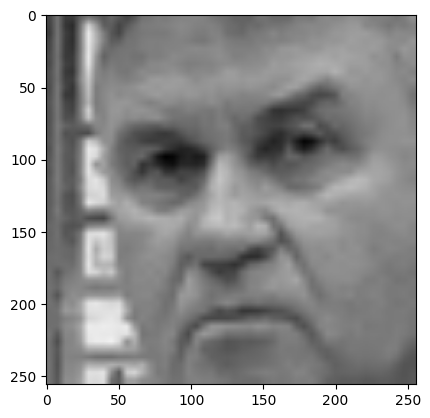

In [38]:
# resize the image
test_img = cv.imread('Test_images\Sad.jpg')
#plt.imshow(test_img)
resize = tf.image.resize(test_img , (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [39]:
# expand because the model expected a batch of images
yhat = Model.predict(np.expand_dims(resize/255.0, 0))

1/1 [==============================] - 0s 185ms/step


In [40]:
# Happy or Sad
if yhat > 0.5 :
    print(f'Predicted Class is Sad')
else:
    print(f'Predicted Class is Happy')

Predicted Class is Sad


# 5- Save the Model

In [41]:
# Save first version of our model
Model.save(os.path.join('models','happy_sad_model_V1.h5'))

In [42]:
# How to load the new model
from tensorflow.keras.models import load_model
new_model = load_model(os.path.join('models','happy_sad_model_V1.h5'))

 **Done Here , Alhamdulla :)** 